In [4]:
import numpy as np
from sklearn import cluster,datasets
from scipy import misc
import matplotlib.pyplot as plt

In [2]:
face=misc.face(gray=True)

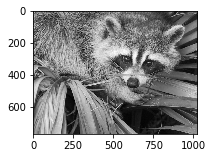

In [8]:
plt.figure(figsize=(10,4))
plt.subplot(131)
plt.imshow(face, cmap=plt.cm.gray)

In [10]:
X=face.reshape(-1,1)
n_clusters=5
k_means=cluster.KMeans(n_clusters=n_clusters, n_init=4)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=4, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [15]:
values=k_means.cluster_centers_.squeeze()

In [14]:
values

array([[151.7770878 ],
       [ 74.85967928],
       [ 27.62031146],
       [193.5128744 ],
       [113.5564522 ]])

In [17]:
clusters=k_means.labels_

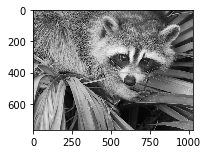

In [19]:
face_compressed = np.choose(clusters, values)
face_compressed.shape = face.shape

vmin = face.min()
vmax = face.max()

# original face
plt.figure(1, figsize=(3, 2.2))
plt.imshow(face, cmap=plt.cm.gray, vmin=vmin, vmax=256)


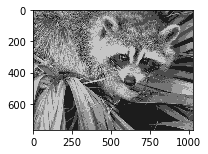

In [20]:
plt.figure(2, figsize=(3, 2.2))
plt.imshow(face_compressed, cmap=plt.cm.gray, vmin=vmin, vmax=vmax)


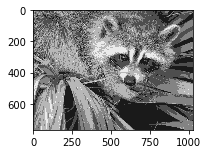

In [21]:
regular_values = np.linspace(0, 256, n_clusters + 1)
regular_labels = np.searchsorted(regular_values, face) - 1
regular_values = .5 * (regular_values[1:] + regular_values[:-1])  # mean
regular_face = np.choose(regular_labels.ravel(), regular_values, mode="clip")
regular_face.shape = face.shape
plt.figure(3, figsize=(3, 2.2))
plt.imshow(regular_face, cmap=plt.cm.gray, vmin=vmin, vmax=vmax)
